In [44]:
import numpy as np
n_bandit_problems = 1000 #1000 bandit problems
n_bandits= 10 # k = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit_problems,n_bandits)) 
#creating a testbed array of shape (1000,10), 
#where each element is drawn from a normal distribution of mean 0 and SD 1
#Each row corresponds to different bandit problem and each column represents a different action
reward_estimates = np.zeros((n_bandit_problems,n_bandits))
#Array of shape 1000,10. The rewards are initialized here, with an initial values of 0 for each

action_count = np.ones((n_bandit_problems,n_bandits))
# this will initialize an array of shape 1000,10. All of them are 1 such that each action is taken atleast once (!)
#will keep track of how many times an action is taken

initial_reward_estimates =  np.random.normal(testbed,1)

In [13]:
action_indices = np.arange(0,10)

In [14]:
mu  = 0 
sigma = 1
shape = (10)

In [16]:
true_rewards = np.random.normal(mu,sigma,shape)

In [17]:
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [38]:
# runtime_rewards = np.array([np.random.normal(true_reward,1,1000) for true_reward in true_rewards])

In [ ]:
rewards[]
# first step
rewards.append(0)
# Step 2 
rewards.append(np.mean(initial_reward_estimates))
# Loop through the actions to calculate the rewards
for step in range(2,steps):
    

In [49]:
def rewards_per_step_mp(steps, n_bandit, n_lever, testbed, initial_reward_estimates):
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    reward_estimates = np.zeros((n_bandit,n_lever))  # _per_pull_per_bandit

    avg_rewards_per_step = []
    avg_rewards_per_step.append(0)
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2,steps):
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):  
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices ) # Breaking ties randomly
        
            # Incremental Algorithm
            Rn = np.random.normal(testbed[problem_index][random_choice],1)
            n = action_count[problem_index] [random_choice]
            Qn = reward_estimates[problem_index][random_choice]
            
            Qnew = ( Rn + (n - 1) * Qn ) / n
            
            reward_estimates[problem_index][random_choice] = Qnew
            action_count[problem_index] [random_choice] = n+1
            
            reward_sum_over_all_bandits_per_step += Qnew
            

        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
        
    # global_reward_list.append(avg_rewards_per_step)
    return avg_rewards_per_step

In [50]:
global_reward_list = rewards_per_step_mp(steps, n_bandit_problems, n_bandits, testbed, initial_reward_estimates)

In [54]:
len(global_reward_list)

1000

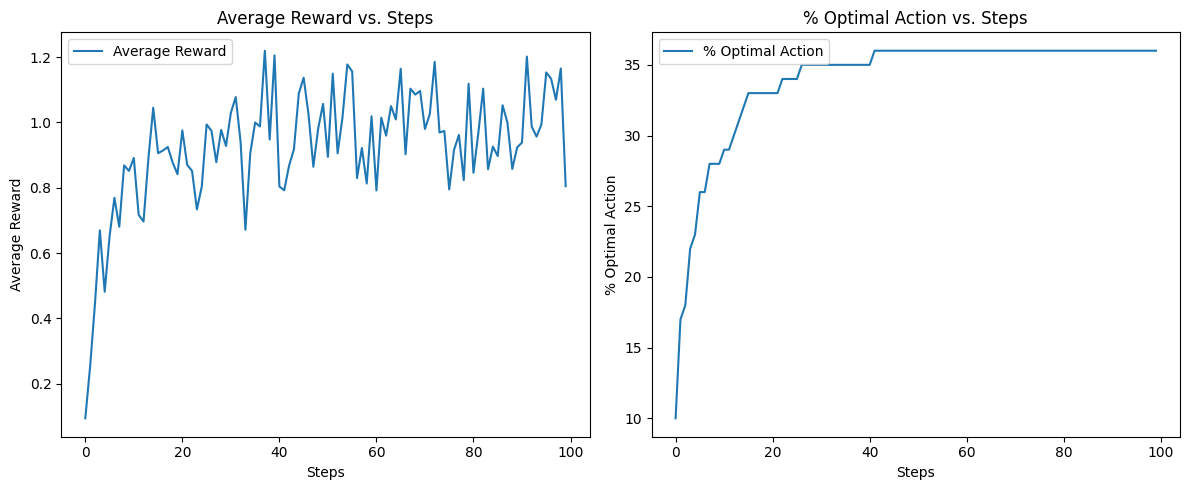

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def rewards_per_step_greedy(steps, n_bandit, n_lever, testbed, global_reward_list, global_optimal_action_list):
    action_count = np.ones((n_bandit, n_lever))  
    reward_estimates = np.zeros((n_bandit, n_lever))  # initial reward estimates set to zero
    # print("Reward estimates", reward_estimates)
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0

        for problem_index in range(n_bandit):  
            maxval = np.amax(reward_estimates[problem_index]) # find the maximum value of the reward for that problem.
            maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval)) #gets the index of that reward in the problem
            # print("maxval and maxval_indices", maxval, maxval_indices)
            random_choice = np.random.choice(maxval_indices)  #in situatuin where there are multiple rewards with the same value
            #: Randomly selects one index from the list of indices with the highest estimated reward. This breaks the tie randomly among the levers that have the same highest estimated reward.
            # print("random choice is" , random_choice)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            # Update reward estimate using the incremental implementation of the simple average method
            reward_estimates[problem_index][random_choice] += (Rn - reward_estimates[problem_index][random_choice]) / n
            
            reward_sum_over_all_bandits_per_step += Rn
            
            # Check if the optimal action was chosen
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / n_bandit)
        optimal_action_count[step] = optimal_action_chosen_count / n_bandit

    global_reward_list.append(avg_rewards_per_step)
    global_optimal_action_list.append(optimal_action_count)
    return

# Parameters
steps = 100
n_bandit = 100
n_lever = 10

# Testbed: 1000 sets of ten mean parameters
testbed = np.random.normal(0, 1, (n_bandit, n_lever))

global_reward_list = []
global_optimal_action_list = []

rewards_per_step_greedy(steps, n_bandit, n_lever, testbed, global_reward_list, global_optimal_action_list)

# Average reward at each time step
average_reward_across_runs = np.mean(global_reward_list, axis=0)

# Percentage of time the optimal action is taken
optimal_action_percentage = np.mean(global_optimal_action_list, axis=0) * 100

# Plotting
plt.figure(figsize=(12, 5))

# Plot average reward
plt.subplot(1, 2, 1)
plt.plot(average_reward_across_runs, label='Average Reward')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps')
plt.legend()

# Plot percentage of optimal action
plt.subplot(1, 2, 2)
plt.plot(optimal_action_percentage, label='% Optimal Action')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action vs. Steps')
plt.legend()

plt.tight_layout()
plt.show()


In [66]:
reward_estimates = np.zeros((n_bandit, n_lever))  # initial reward estimates set to zero
reward_estimates[0][5] =100
maxval = (np.amax(reward_estimates[0]))
print(np.ravel(np.where(reward_estimates[0] == maxval)))
print(maxval)

[5]
100.0
